**Calculate TD shot gather from FD modelling results**<br />
Daniel Köhn<br />
Kiel, 01.09.2017

**Import necessary packages**

In [91]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import matplotlib as mpl
from pylab import rcParams
from matplotlib import rc
from scipy import interpolate
#%matplotlib notebook

**Define parameters for data visualization**

In [92]:
clip = 1e-2   # data clip
nsrc = 40     # number of shots
ntr = 117     # number of receivers
shotno = 1    # extract FDFD data for shot shotno

# number of frequencies nf and frequency interval df
FC_low = 50e6
FC_high = 200e6

nf = 512
df = (FC_high - FC_low) / (nf-1)
nfnsrc = nf * nsrc

# TD parameters
TmaxTD = 150e-9       # maximum time TD
TmaxFD = 0.25 / df    # maximum time FD
dt = TmaxFD / nf      # time sampling FD

# maximum time sample of FD2TD corresponding to TmaxTD
nmaxFD = np.int(TmaxTD / dt)

# define time samples in time and frequency domain
tFD = np.arange(0.0, TmaxTD, dt)
offset = np.arange(0, ntr, 1)

**Font properties**

In [93]:
FSize = 25
font = {'color':  'black',
        'weight': 'bold',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 15, 15

__Time Damping__

In [94]:
S = 0.0

**Read 2 cross TE-mode FD data**

In [95]:
name_FDFD = "../seis/2_cross_TE_p_stage_1.bin"
f = open (name_FDFD)
data_type = np.dtype ('float32').newbyteorder ('<')
data_FDFD = np.fromfile(f, dtype=data_type)
data_FDFD = data_FDFD.reshape(nf*nsrc,2*ntr)
data_FDFD = np.transpose(data_FDFD)
data_FDFD = np.flipud(data_FDFD)

**Extract FD data for shot shotno**

In [96]:
FD_real = data_FDFD[0:2*ntr-1:2,shotno-1:nfnsrc:nsrc]
FD_imag = data_FDFD[1:2*ntr:2,shotno-1:nfnsrc:nsrc]
data_FDFD = None

In [97]:
# assemble complex data
FDFD = FD_real + 1j*FD_imag
FD_real = None
FD_imag = None
FDFD = np.transpose(FDFD)

tmp1 = np.concatenate((FDFD, np.zeros((nf, ntr)), np.zeros((nf, ntr)), np.flipud(FDFD)))
FDFD = None
FDFD = tmp1

**IFFT of FD data**

In [98]:
# transformation from FD to TD
FD2TD = np.fft.ifft(FDFD,axis=0)
FD2TD = np.real(FD2TD)
tmp1 = None

**Extract FD2TD up to TmaxTD and resample FD2TD from dtFD to dt**

In [99]:
# extract FD2TD data up to TmaxTD
tmp1 = FD2TD[1:nmaxFD,:]
FD2DTD = None

# clean memory
tmp = None

In [100]:
#plt.imshow(FD2TD, vmin=-clip, vmax=clip)
#plt.show()

In [101]:
#print(np.shape(tFD), np.shape(offset), np.shape(tmp1))

__Damp Time Domain Data__

In [102]:
#tmp2 = np.exp(-S * tTD)
#tdamp = np.tile(tmp2,(ntr,1))
#tdamp = np.flipud(tdamp.T)
#traces = traces * tdamp

#tmp2 = None
#tdamp = None

**Normalize data**

In [103]:
#max_TD = np.max(traces)
max_FD = np.max(tmp1)
tmp1 = tmp1 / max_FD
FD2TD = np.flipud(tmp1)

tmp1 = None

**Plot shot gather**

In [104]:
def do_plot(n, model, cm, an, title, clip):
    
    extent = [np.min(offset), np.max(offset), 0.0, dt * nmaxFD * 1e9]

    plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    plt.rc('text', usetex=True)

    im = plt.imshow(model, cmap=cm, interpolation='nearest', extent=extent, vmin=-clip, vmax=clip, aspect=0.5)

    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)

    plt.title(title, fontdict=font)
    if n==1:
        plt.ylabel('Time [ns]', fontdict=font)
    plt.xlabel('Trace no.', fontdict=font)
    plt.gca().invert_yaxis()

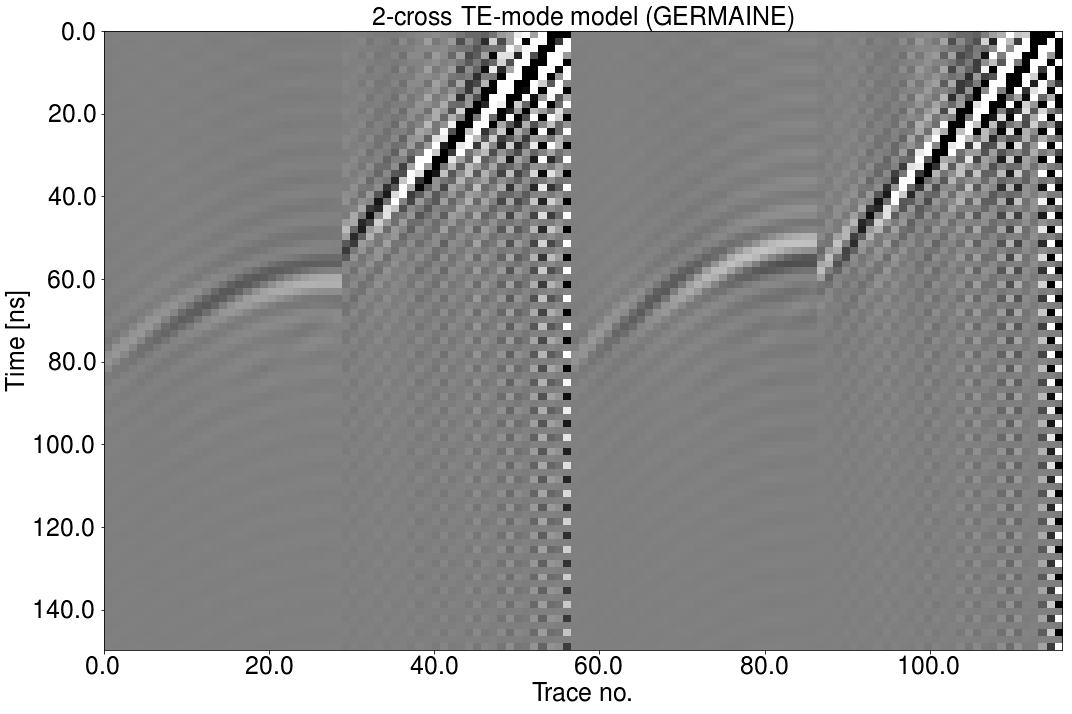

In [105]:
plt.close('all')
plt.figure()
do_plot(1, FD2TD, 'gray', '(b)', r"2-cross TE-mode model (GERMAINE)", clip)
plt.tight_layout()
#output_file = "Marmousi_shot_" + str_shotno + "_TDFD_FDFD.pdf"
#plt.savefig(output_file, bbox_inches='tight', format='pdf')
plt.show()